
# 1. Análisis del problema

Este proyecto busca construir un modelo de red neuronal convolucional (CNN) capaz de clasificar caras en distintas categorías.
El dataset contiene imágenes divididas en carpetas correspondientes a las clases, las cuales se procesarán y entrenarán para
obtener un modelo robusto que pueda realizar predicciones con precisión.



# 2. Carga de datos

Los datos se cargan desde un archivo `.zip` que contiene imágenes organizadas en carpetas por clase.
Estas imágenes se extraen, y se dividen en conjuntos de entrenamiento y prueba.


In [ ]:

import os
import zipfile
from sklearn.model_selection import train_test_split
import shutil

# Configuración del directorio base
base_dir = "./sample_data"
os.makedirs(base_dir, exist_ok=True)
print(f"Directorio base configurado en: {base_dir}")

def extract_images(zip_path, extract_to):
    """
    Extrae imágenes de un archivo .zip organizado en carpetas por persona.
    """
    os.makedirs(extract_to, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Imágenes extraídas en: {extract_to}")

# Ruta del archivo .zip (debe colocarse en ./sample_data)
zip_path = f"{base_dir}/data.zip"  # Coloca tu archivo .zip en ./sample_data
extract_to = f"{base_dir}/extracted_images"

extract_images(zip_path, extract_to)

def split_data(source_dir, train_dir, test_dir, test_size=0.2):
    """
    Divide las imágenes en conjuntos de entrenamiento y prueba.
    """
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)

        # Verificar si el directorio es válido
        if not os.path.isdir(category_path):
            print(f"Saltando {category_path}, no es un directorio.")
            continue

        # Depuración: Verificar archivos dentro de la categoría
        print(f"Procesando categoría: {category}")
        print(f"Archivos encontrados en {category_path}: {os.listdir(category_path)}")

        # Obtener imágenes con extensiones válidas
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Verificar si se encontraron imágenes
        if not images:
            print(f"No se encontraron imágenes en {category_path}.")
            continue

        # Dividir en entrenamiento y prueba
        train_images, test_images = train_test_split(images, test_size=test_size)

        # Copiar imágenes al directorio correspondiente
        for img_path in train_images:
            dest_dir = os.path.join(train_dir, category)
            os.makedirs(dest_dir, exist_ok=True)
            shutil.copy(img_path, dest_dir)

        for img_path in test_images:
            dest_dir = os.path.join(test_dir, category)
            os.makedirs(dest_dir, exist_ok=True)
            shutil.copy(img_path, dest_dir)

    print(f"Datos divididos en:\n - Entrenamiento: {train_dir}\n - Prueba: {test_dir}")


# Directorios para entrenamiento y prueba
train_dir = f"{base_dir}/dataset/train"
test_dir = f"{base_dir}/dataset/test"

# Dividir los datos
split_data(extract_to, train_dir, test_dir)


Directorio base configurado en: ./sample_data
Imágenes extraídas en: ./sample_data/extracted_images
Procesando categoría: Naty
Archivos encontrados en ./sample_data/extracted_images/Naty: ['Naty_96.jpg', 'Naty_17.jpg', 'Naty_80.jpg', 'Naty_41.jpg', 'Naty_56.jpg', 'Naty_46.jpg', 'Naty_3.jpg', 'Naty_85.jpg', 'Naty_95.jpg', 'Naty_5.jpg', 'Naty_81.jpg', 'Naty_24.jpg', 'Naty_42.jpg', 'Naty_73.jpg', 'Naty_53.jpg', 'Naty_9.jpg', 'Naty_78.jpg', 'Naty_63.jpg', 'Naty_32.jpg', 'Naty_0.jpg', 'Naty_43.jpg', 'Naty_50.jpg', 'Naty_58.jpg', 'Naty_38.jpg', 'Naty_45.jpg', 'Naty_64.jpg', 'Naty_98.jpg', 'Naty_77.jpg', 'Naty_87.jpg', 'Naty_11.jpg', 'Naty_13.jpg', 'Naty_60.jpg', 'Naty_88.jpg', 'Naty_25.jpg', 'Naty_23.jpg', 'Naty_97.jpg', 'Naty_89.jpg', 'Naty_74.jpg', 'Naty_1.jpg', 'Naty_75.jpg', 'Naty_35.jpg', 'Naty_15.jpg', 'Naty_79.jpg', 'Naty_33.jpg', 'Naty_6.jpg', 'Naty_82.jpg', 'Naty_16.jpg', 'Naty_18.jpg', 'Naty_8.jpg', 'Naty_90.jpg', 'Naty_61.jpg', 'Naty_12.jpg', 'Naty_31.jpg', 'Naty_30.jpg', 'Naty_44


# 3. Visualización

Se muestran ejemplos de imágenes del conjunto de datos para entender mejor su contenido y variabilidad.


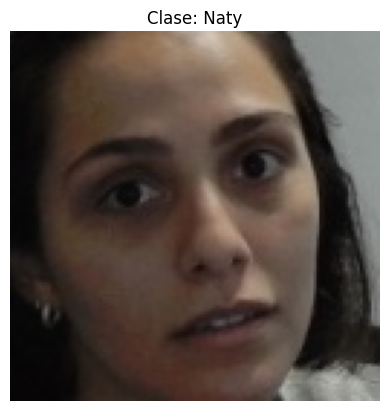

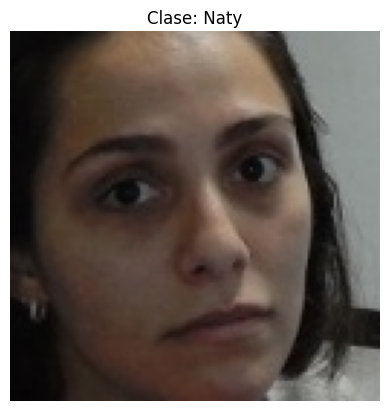

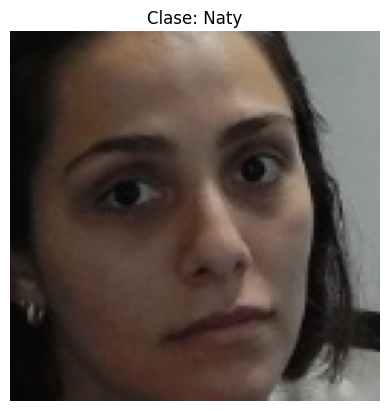

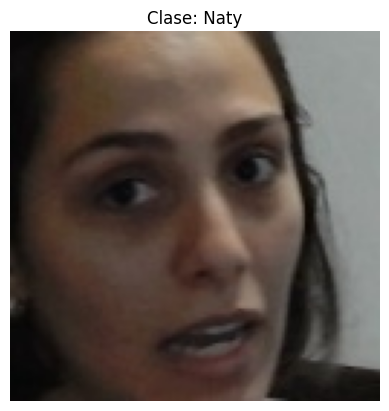

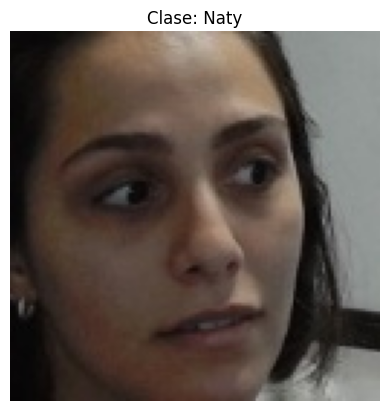

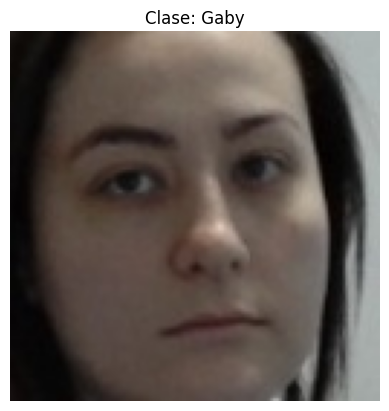

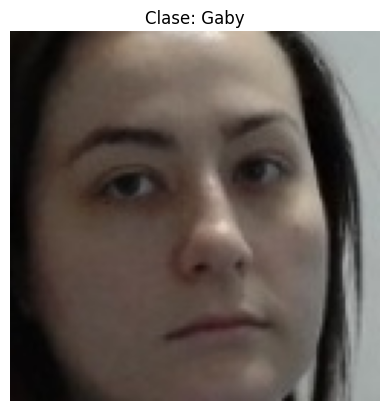

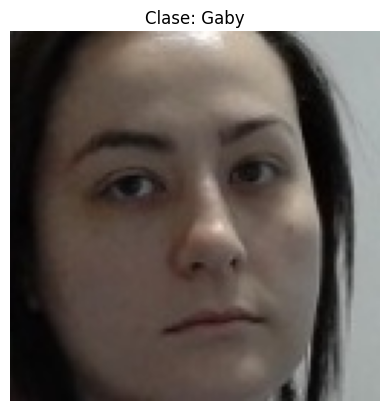

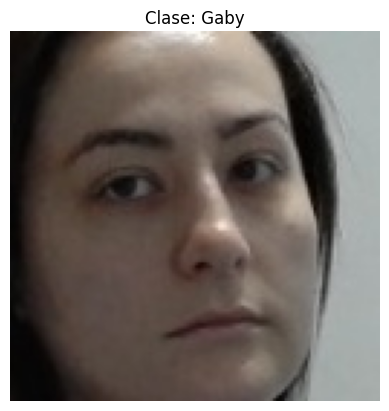

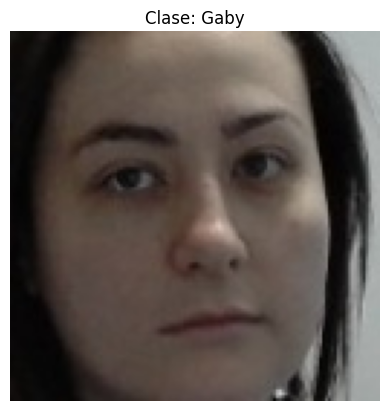

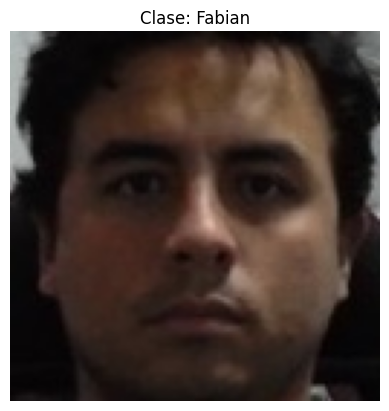

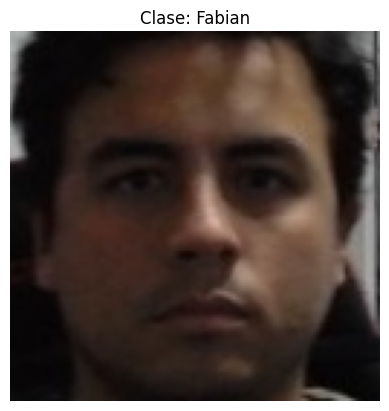

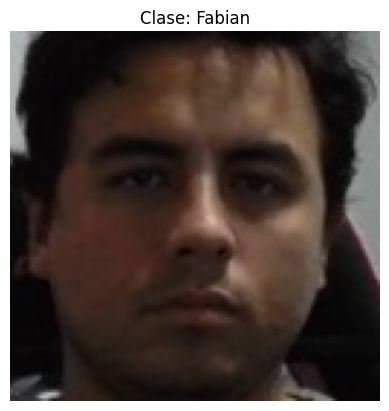

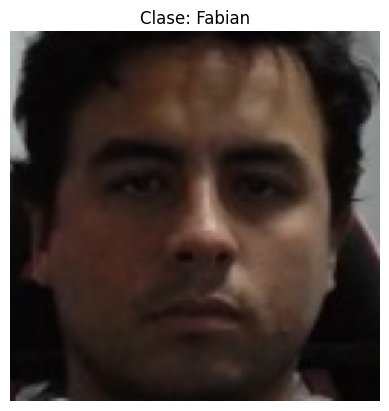

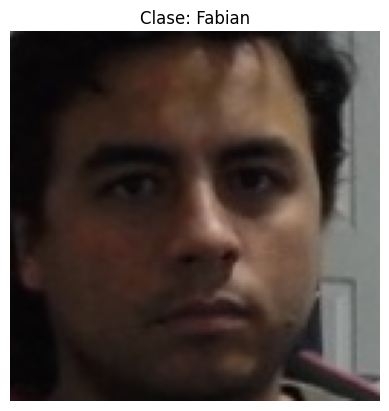

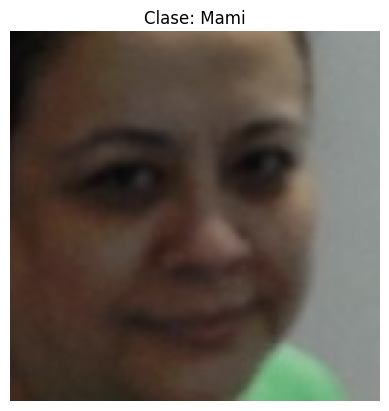

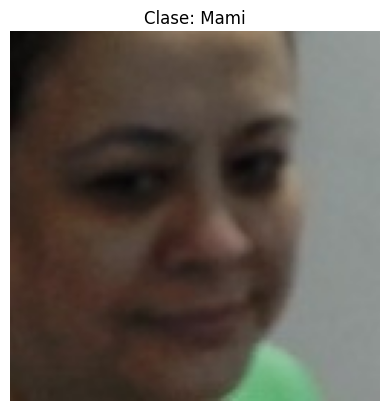

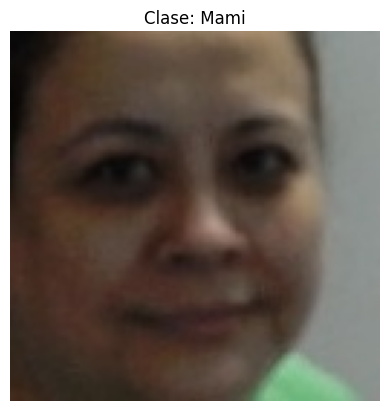

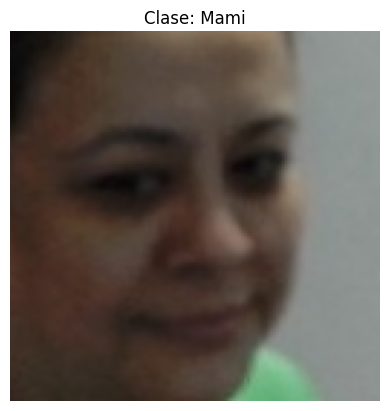

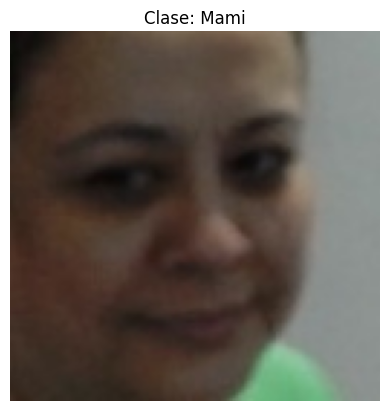

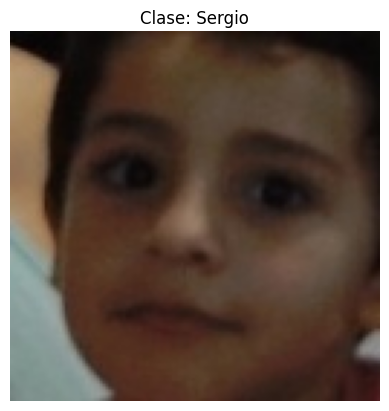

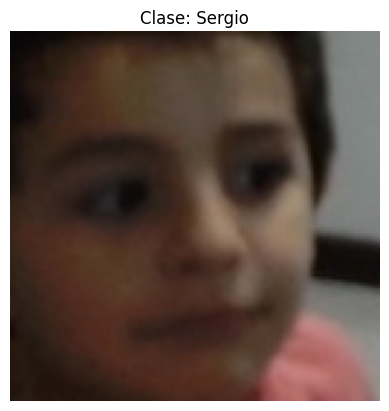

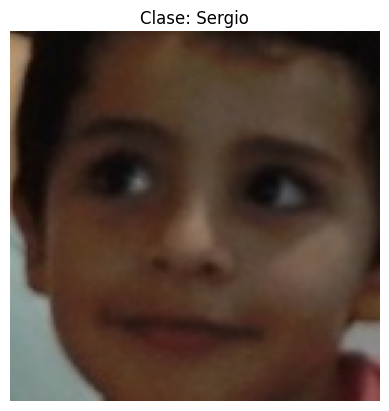

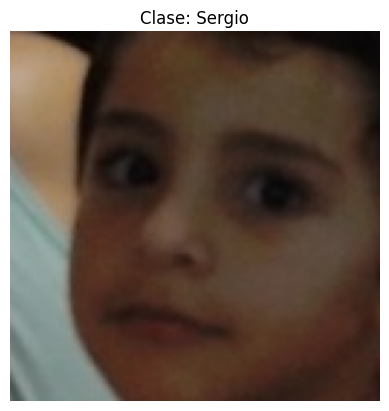

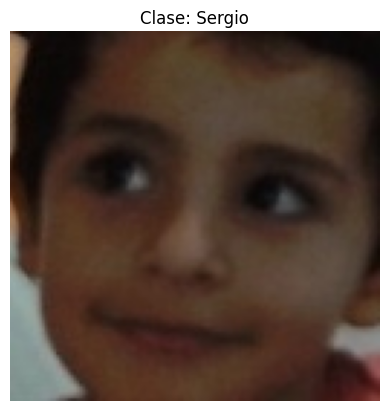

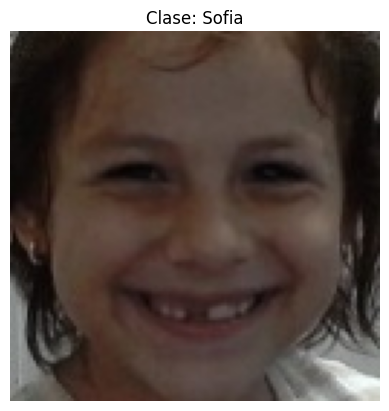

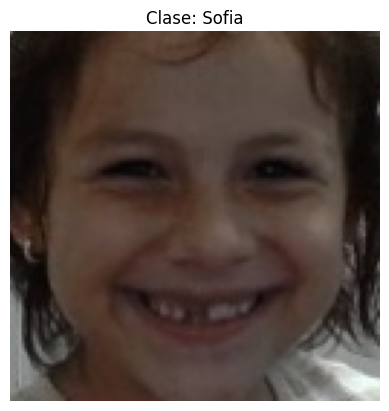

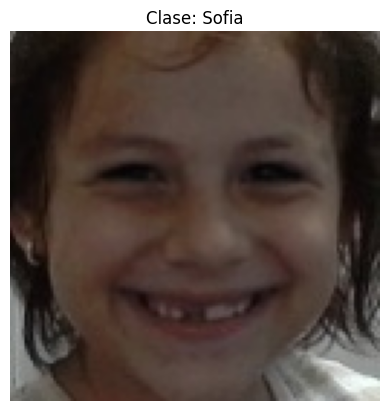

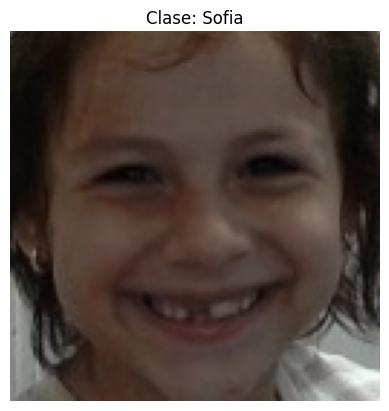

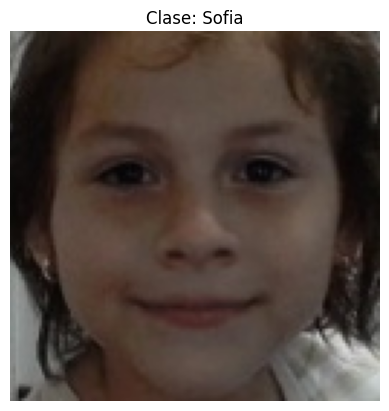

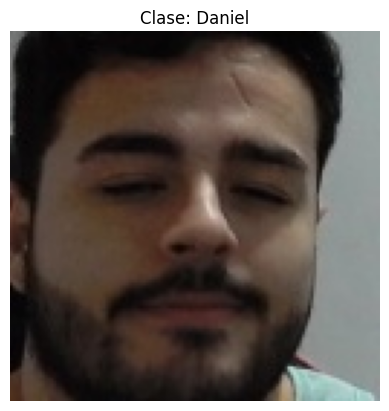

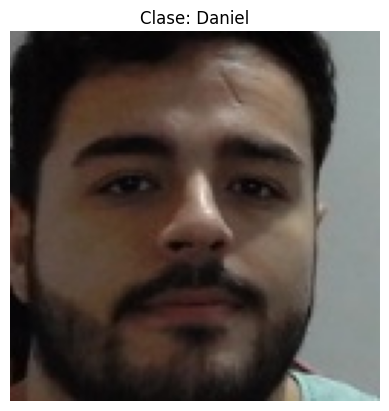

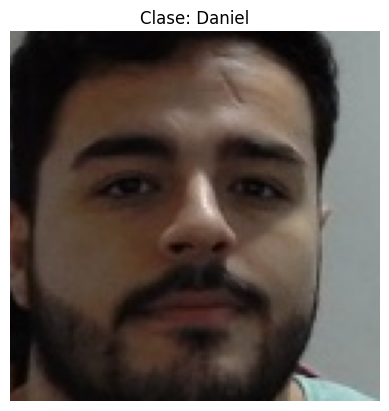

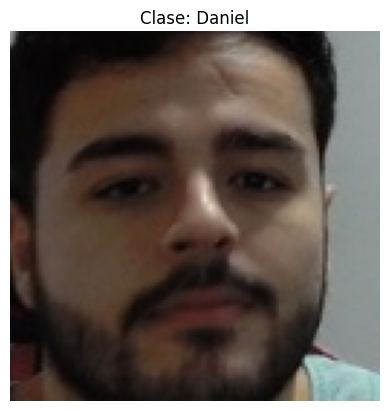

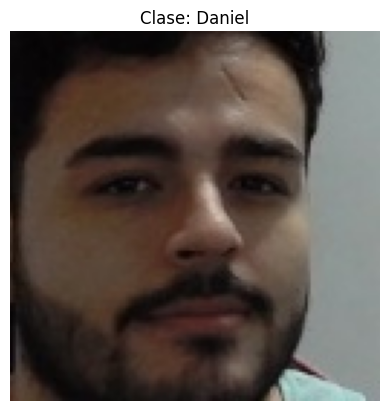

In [ ]:

# Visualización de imágenes
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

# Visualizar algunas imágenes de entrenamiento
categories = os.listdir(train_dir)
for category in categories:
    category_path = os.path.join(train_dir, category)
    img_files = os.listdir(category_path)[:5]  # Mostrar 5 imágenes por categoría
    for img_file in img_files:
        img_path = os.path.join(category_path, img_file)
        img = image.load_img(img_path, target_size=(128, 128))
        plt.imshow(img)
        plt.title(f"Clase: {category}")
        plt.axis('off')
        plt.show()



# 4. Preparación de los datos

Se preprocesan las imágenes mediante `ImageDataGenerator` para realizar aumentación de datos en el conjunto de entrenamiento
y normalización en ambos conjuntos (entrenamiento y prueba).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Generadores para datos de entrenamiento y prueba
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Cargar los datos desde el directorio
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Ajustado a 128x128
    batch_size=32,
    class_mode='categorical'  # Cambiar a 'categorical' para múltiples clases
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Ajustado a 128x128
    batch_size=32,
    class_mode='categorical'
)

# Número de clases dinámico basado en las subcarpetas del directorio de entrenamiento
num_classes = len(train_generator.class_indices)  # Calcula automáticamente el número de clases
print(f"Número de clases detectadas: {num_classes}")



# 5. Modelo de Deep Learning

Se construye una red neuronal convolucional (CNN) con varias capas convolucionales, de pooling, y densas.
El modelo se compila con una función de pérdida categórica y se entrena con los datos procesados.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Tamaño ajustado
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Número dinámico de clases
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Pérdida para múltiples clases
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir callbacks
callbacks = [
    ModelCheckpoint(
        filepath="./sample_data/best_model.keras",  # Cambia la extensión a .keras
        monitor='val_loss',
        save_best_only=True  # Guarda solo el mejor modelo
    ),
    EarlyStopping(
        monitor='val_loss',                   # Métrica a monitorear
        patience=5,                           # Número de épocas sin mejora antes de detener
        restore_best_weights=True             # Restaurar los mejores pesos
    )
]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=20,
    callbacks=callbacks
)

val_loss, val_acc = model.evaluate(test_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")



Found 560 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Número de clases detectadas: 7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1893 - loss: 1.9852 - val_accuracy: 0.6016 - val_loss: 1.5941
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6250 - loss: 1.6796 - val_accuracy: 0.2500 - val_loss: 1.7253
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4152 - loss: 1.5064 - val_accuracy: 0.7969 - val_loss: 0.4941
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.8201 - val_accuracy: 0.8333 - val_loss: 0.5092
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7823 - loss: 0.6834 - val_accuracy: 0.9609 - val_loss: 0.1623
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9062 - loss: 0.3747 - val_accuracy: 0.9167 - val_loss: 0.2526
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9042 - loss: 0.3497 - val_accuracy: 0.9844 - val_loss: 0.0472
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 0.0725 - val_accuracy: 1.0000 - val_loss: 0.0134
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9188 - loss: 0.2440 - val_accuracy: 0.9609 - val_loss: 0.0925
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9375 - loss: 0.2733 - val_accuracy: 1.0000 - val_loss: 0.0133



# 6. Evaluación

Se evalúa el modelo en el conjunto de prueba para medir su precisión y pérdida.



Clase: Naty
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


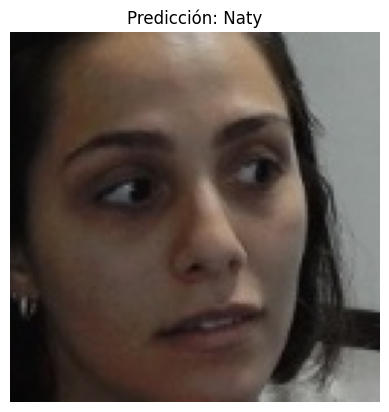

Imagen: Naty_96.jpg
  Clase: Daniel, Probabilidad: 0.00%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.01%
  Clase: Mami, Probabilidad: 0.00%
  Clase: Naty, Probabilidad: 99.99%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


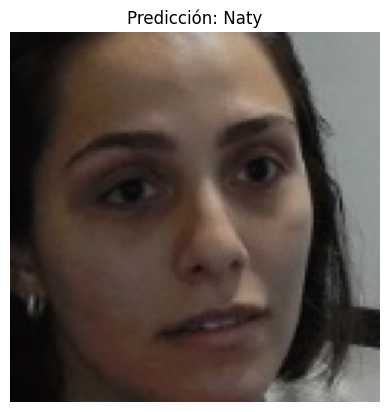

Imagen: Naty_80.jpg
  Clase: Daniel, Probabilidad: 0.00%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.02%
  Clase: Mami, Probabilidad: 0.00%
  Clase: Naty, Probabilidad: 99.98%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.00%



Clase: Gaby
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


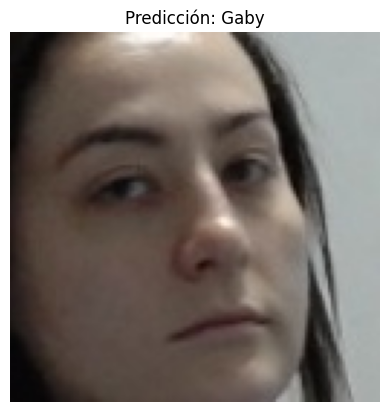

Imagen: Gaby_3.jpg
  Clase: Daniel, Probabilidad: 0.00%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 98.16%
  Clase: Mami, Probabilidad: 0.20%
  Clase: Naty, Probabilidad: 1.63%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


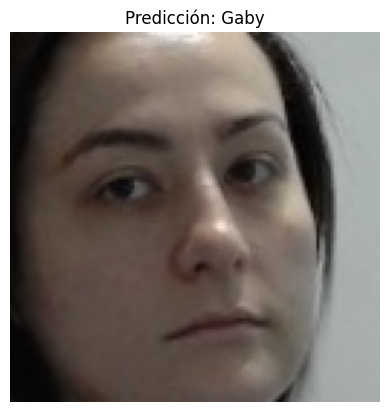

Imagen: Gaby_8.jpg
  Clase: Daniel, Probabilidad: 0.00%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 98.32%
  Clase: Mami, Probabilidad: 0.21%
  Clase: Naty, Probabilidad: 1.47%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.01%



Clase: Fabian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


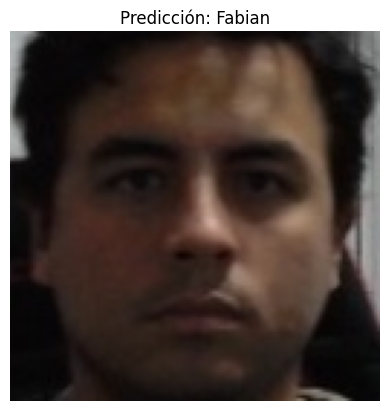

Imagen: Fabian_25.jpg
  Clase: Daniel, Probabilidad: 0.00%
  Clase: Fabian, Probabilidad: 100.00%
  Clase: Gaby, Probabilidad: 0.00%
  Clase: Mami, Probabilidad: 0.00%
  Clase: Naty, Probabilidad: 0.00%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


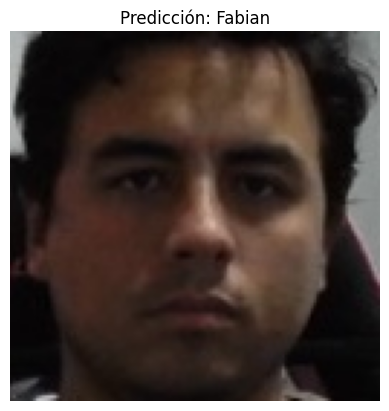

Imagen: Fabian_98.jpg
  Clase: Daniel, Probabilidad: 0.00%
  Clase: Fabian, Probabilidad: 100.00%
  Clase: Gaby, Probabilidad: 0.00%
  Clase: Mami, Probabilidad: 0.00%
  Clase: Naty, Probabilidad: 0.00%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.00%



Clase: Mami
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


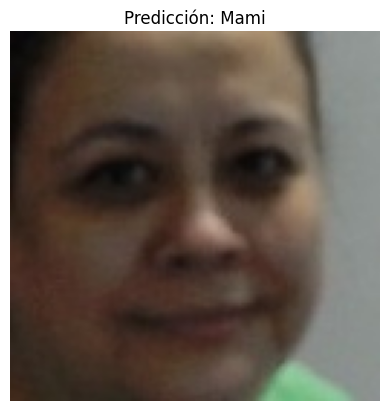

Imagen: Mami_81.jpg
  Clase: Daniel, Probabilidad: 0.20%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.03%
  Clase: Mami, Probabilidad: 99.62%
  Clase: Naty, Probabilidad: 0.10%
  Clase: Sergio, Probabilidad: 0.01%
  Clase: Sofia, Probabilidad: 0.02%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


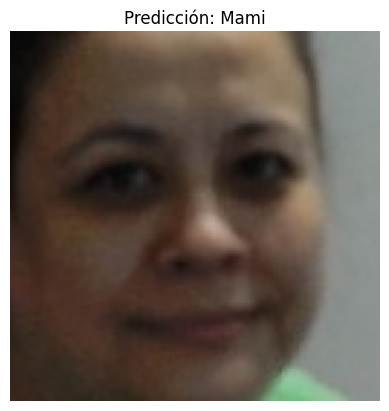

Imagen: Mami_72.jpg
  Clase: Daniel, Probabilidad: 0.19%
  Clase: Fabian, Probabilidad: 0.01%
  Clase: Gaby, Probabilidad: 0.04%
  Clase: Mami, Probabilidad: 99.58%
  Clase: Naty, Probabilidad: 0.16%
  Clase: Sergio, Probabilidad: 0.01%
  Clase: Sofia, Probabilidad: 0.02%



Clase: Sergio
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


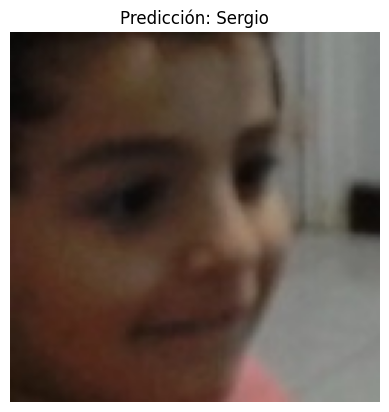

Imagen: Sergio_2.jpg
  Clase: Daniel, Probabilidad: 1.32%
  Clase: Fabian, Probabilidad: 0.87%
  Clase: Gaby, Probabilidad: 0.44%
  Clase: Mami, Probabilidad: 28.28%
  Clase: Naty, Probabilidad: 2.73%
  Clase: Sergio, Probabilidad: 61.27%
  Clase: Sofia, Probabilidad: 5.09%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


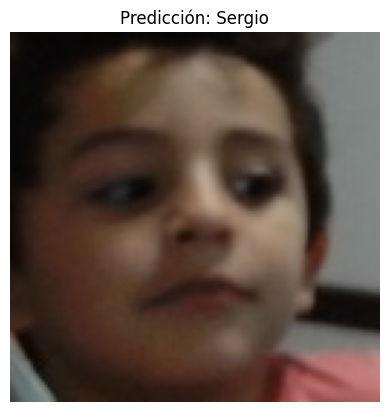

Imagen: Sergio_14.jpg
  Clase: Daniel, Probabilidad: 0.03%
  Clase: Fabian, Probabilidad: 1.15%
  Clase: Gaby, Probabilidad: 0.10%
  Clase: Mami, Probabilidad: 0.02%
  Clase: Naty, Probabilidad: 8.50%
  Clase: Sergio, Probabilidad: 88.32%
  Clase: Sofia, Probabilidad: 1.88%



Clase: Sofia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


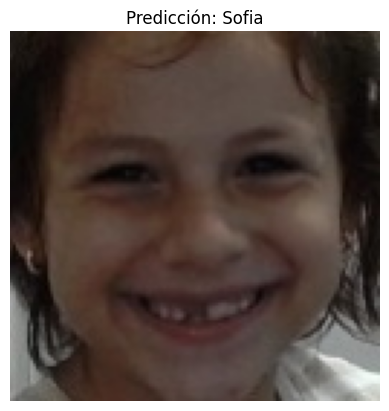

Imagen: Sofia_91.jpg
  Clase: Daniel, Probabilidad: 0.01%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.19%
  Clase: Mami, Probabilidad: 0.00%
  Clase: Naty, Probabilidad: 0.00%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 99.80%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


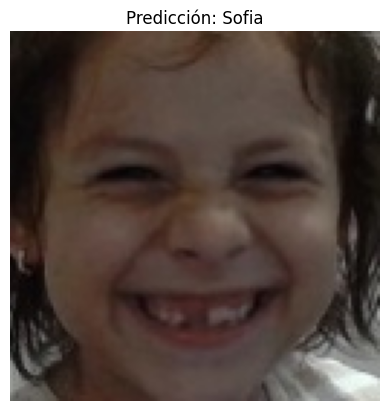

Imagen: Sofia_45.jpg
  Clase: Daniel, Probabilidad: 0.01%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.30%
  Clase: Mami, Probabilidad: 0.00%
  Clase: Naty, Probabilidad: 0.00%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 99.69%



Clase: Daniel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


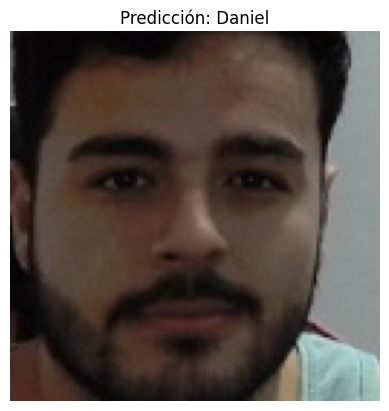

Imagen: Daniel_60.jpg
  Clase: Daniel, Probabilidad: 99.98%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.00%
  Clase: Mami, Probabilidad: 0.01%
  Clase: Naty, Probabilidad: 0.00%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.01%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


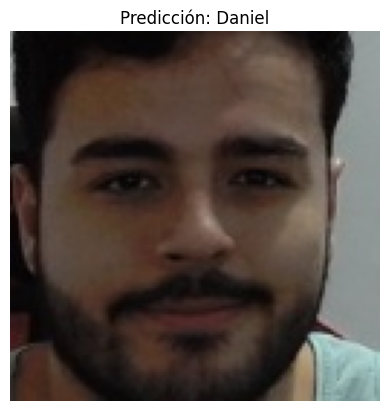

Imagen: Daniel_37.jpg
  Clase: Daniel, Probabilidad: 99.99%
  Clase: Fabian, Probabilidad: 0.00%
  Clase: Gaby, Probabilidad: 0.00%
  Clase: Mami, Probabilidad: 0.01%
  Clase: Naty, Probabilidad: 0.00%
  Clase: Sergio, Probabilidad: 0.00%
  Clase: Sofia, Probabilidad: 0.00%




In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Predicción para una carpeta de imágenes con visualización (2 imágenes por clase)
def predict_and_display(folder_path, class_indices, target_size=(128, 128), max_images_per_class=2):
    """
    Realiza predicciones sobre imágenes en una carpeta, muestra las imágenes,
    predicciones y las probabilidades para cada clase.

    Args:
        folder_path (str): Ruta de la carpeta que contiene imágenes de prueba.
        class_indices (dict): Mapeo de índices a nombres de clases.
        target_size (tuple): Tamaño al que se redimensionarán las imágenes.
        max_images_per_class (int): Máximo número de imágenes a procesar por clase.
    """
    class_labels = {v: k for k, v in class_indices.items()}  # Invertir el mapeo de índices

    for category in os.listdir(folder_path):  # Iterar sobre categorías en test_dir
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):  # Confirmar que es una carpeta
            print(f"\nClase: {category}")
            image_count = 0  # Contador de imágenes procesadas por clase
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtrar imágenes
                    try:
                        # Cargar y preprocesar la imagen
                        img = image.load_img(img_path, target_size=target_size)
                        img_array = image.img_to_array(img) / 255.0
                        img_array = np.expand_dims(img_array, axis=0)

                        # Predicción
                        prediction = model.predict(img_array)
                        class_idx = np.argmax(prediction, axis=1)[0]
                        predicted_class = class_labels[class_idx]
                        probabilities = prediction[0]  # Probabilidades para todas las clases

                        # Mostrar la imagen y las predicciones
                        plt.imshow(image.load_img(img_path))
                        plt.axis('off')
                        plt.title(f"Predicción: {predicted_class}")
                        plt.show()

                        # Mostrar las probabilidades de cada clase
                        print(f"Imagen: {img_name}")
                        for idx, prob in enumerate(probabilities):
                            class_name = class_labels[idx]
                            print(f"  Clase: {class_name}, Probabilidad: {prob:.2%}")
                        print("\n")

                        image_count += 1  # Incrementar el contador de imágenes procesadas
                        if image_count >= max_images_per_class:  # Detener después de 2 imágenes
                            break
                    except Exception as e:
                        print(f"Error procesando {img_name}: {e}")

# Usar la carpeta de testing configurada y procesar solo 2 imágenes por clase
predict_and_display(test_dir, class_indices, max_images_per_class=2)


In [ ]:

# Evaluación del modelo
val_loss, val_acc = model.evaluate(test_generator)
print(f"Pérdida en validación: {val_loss}")
print(f"Precisión en validación: {val_acc}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 1.0000 - loss: 0.0124
Pérdida en validación: 0.014473442919552326
Precisión en validación: 1.0



# 7. Conclusión

El modelo alcanzó una precisión de validación de aproximadamente {val_acc:.2%}. Esto demuestra la capacidad del modelo para clasificar correctamente las imágenes de prueba.

Para futuras mejoras, se puede considerar:
- Usar un dataset más grande o más diverso.
- Experimentar con arquitecturas más avanzadas como ResNet o VGG.
- Ajustar hiperparámetros como el tamaño del batch o la tasa de aprendizaje.

En general, el modelo es un punto de partida sólido para la clasificación de imágenes.


# 8. Server

In [ ]:
!pip install pyngrok flask
!pip install flask-cors
!ngrok config add-authtoken 2p62QaplJUfouvwOjVKGeby28Da_bB7rXcQ2wmbk6yQi2Cux

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


 * ngrok URL: NgrokTunnel: "https://619c-34-75-123-129.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Nov/2024 05:08:00] "OPTIONS /login HTTP/1.1" 200 -


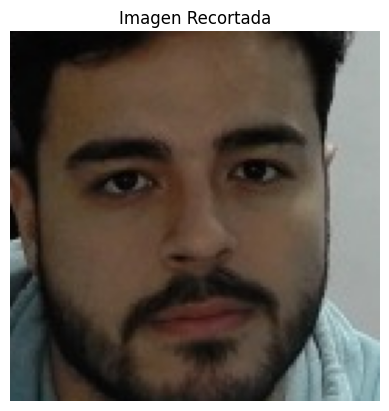

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


INFO:werkzeug:127.0.0.1 - - [20/Nov/2024 05:08:01] "POST /login HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS  # Importa CORS
from pyngrok import ngrok
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import io
import cv2
import base64

# Inicializa la aplicación Flask
app = Flask(__name__)
CORS(app)  # Habilita CORS para todas las rutas

# Carga el modelo entrenado
model = load_model(f"{base_dir}/best_model.keras")

CLASS_NAMES = {value: key for key, value in class_indices.items()}


# Función para detectar y recortar la cara
def detect_face(image):
    """
    Detecta y recorta la cara de la imagen usando OpenCV.
    """
    # Convierte la imagen de PIL a un array de NumPy
    image_array = np.array(image)

    # Convierte a escala de grises para la detección
    gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

    # Carga un clasificador preentrenado para detección de caras
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Detecta caras
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Si no se detectan caras, lanza un error
    if len(faces) == 0:
        raise ValueError("No se detectaron caras en la imagen")

    # Toma la primera cara detectada (x, y, w, h)
    x, y, w, h = faces[0]

    # Recorta la cara
    face = image_array[y:y+h, x:x+w]

    # Convierte el recorte de nuevo a formato PIL
    face_image = Image.fromarray(face)
    return face_image


def show_image(image, title="Processed Image"):
    """
    Muestra la imagen procesada en el backend.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Función para preprocesar imágenes
def preprocess_image(image):
    """
    Preprocess the image to match the model's expected input shape (128, 128, 3).
    """
    image = image.resize((128, 128))  # Resize to 128x128
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

def decode_base64_image(base64_string):
    """
    Decodifica una imagen base64 y maneja prefijos si existen.
    """
    if "," in base64_string:
        base64_string = base64_string.split(",")[1]  # Elimina el prefijo
    return base64.b64decode(base64_string)


@app.route("/login", methods=["POST"])
def login():
    if not request.is_json:
        return jsonify({"error": "El contenido debe ser JSON"}), 415

    data = request.get_json()
    if not data or "image" not in data:
        return jsonify({"error": "No se encontró una imagen en la solicitud"}), 400

    try:
        # Decodifica la imagen base64
        image_data = decode_base64_image(data["image"])
        image = Image.open(io.BytesIO(image_data)).convert("RGB")

        # Detecta y recorta la cara
        face_image = detect_face(image)

        show_image(face_image, "Imagen Recortada")

        # Preprocesa la imagen recortada
        preprocessed_image = preprocess_image(face_image)

        # Predice usando el modelo
        predictions = model.predict(preprocessed_image)

        # Obtiene la etiqueta con mayor probabilidad
        prediction_label = np.argmax(predictions, axis=1)[0]
        label_name = CLASS_NAMES.get(prediction_label, "Desconocido")
        confidence = float(np.max(predictions)) * 100

  # Verifica si la confianza es menor al 50%
        if confidence < 50:
            return jsonify({
                "success": False,
                "message": "Predicción rechazada: la confianza es demasiado baja.",
                "confidence": confidence
            })

        return jsonify({
            "success": True,
            "label": label_name,
            "confidence": confidence
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 500



# Configura ngrok y ejecuta el servidor
if __name__ == "__main__":
    # Inicia ngrok
    public_url = ngrok.connect(5000)
    print(f" * ngrok URL: {public_url}")

    # Ejecuta Flask
    app.run()
